In [15]:
pip install --upgrade transformers

  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/b6/4d/fbe6d89fde59d8107f0a02816c4ac4542a8f9a85559fdf33c68282affcc1/transformers-4.38.2-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 6.9 MB/s eta 0:00:00
  Obtaining dependency information for huggingface-hub<1.0,>=0.19.3 from https://files.pythonhosted.org/packages/ab/28/d4b691840d73126d4c9845f8a22dad033ac872509b6d3a0d93b456eef424/huggingface_hub-0.21.4-py3-none-any.whl.metadata
  Obtaining dependency information for tokenizers<0.19,>=0.14 from https://files.pythonhosted.org/packages/5f/4f/a4c12cc058a899c1caaa1e689c3df9a698e20e891d4005aa6ec2174a9339/tokenizers-0.15.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for safetensors>=0.4.1 from https://files.pythonhosted.org/packages/03/a0/67f2ed19dbc609ce1bf561a285a6cc8f804846a7f4d9c46b403be93022e4/safetensors-0.4.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining de

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import transformers
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertModel

In [2]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [3]:
df = pd.read_csv("./data/BooksDataSet.csv")
df.head()

,Unnamed: 0,book_id,book_name,genre,summary
0,0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,book_id,book_name,genre,summary
0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [5]:
print(df['genre'].value_counts())

genre
Fantasy             500
Science Fiction     500
Crime Fiction       500
Historical novel    500
Horror              500
Thriller            500
Name: count, dtype: int64


In [6]:
df['labels'] = [[0] * 6 for _ in range(len(df))]
df.head()

,book_id,book_name,genre,summary,labels
0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...,"[0, 0, 0, 0, 0, 0]"
1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ...","[0, 0, 0, 0, 0, 0]"
2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...,"[0, 0, 0, 0, 0, 0]"
3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...,"[0, 0, 0, 0, 0, 0]"
4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...,"[0, 0, 0, 0, 0, 0]"


In [7]:
for book in df.itertuples():
    genre = book.genre
    if genre == 'Fantasy':
        book.labels[0] = 1
    elif genre == 'Science Fiction':
        book.labels[1] = 1
    elif genre == 'Crime Fiction':
        book.labels[2] = 1
    elif genre == 'Historical novel':
        book.labels[3] = 1
    elif genre == 'Horror':
        book.labels[4] = 1
    elif genre == 'Thriller':
        book.labels[5] = 1

In [8]:
df.head()

,book_id,book_name,genre,summary,labels
0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...,"[1, 0, 0, 0, 0, 0]"
1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ...","[1, 0, 0, 0, 0, 0]"
2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...,"[1, 0, 0, 0, 0, 0]"
3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...,"[1, 0, 0, 0, 0, 0]"
4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...,"[1, 0, 0, 0, 0, 0]"


In [12]:
print(df['labels'])

0       [1, 0, 0, 0, 0, 0]
1       [1, 0, 0, 0, 0, 0]
2       [1, 0, 0, 0, 0, 0]
3       [1, 0, 0, 0, 0, 0]
4       [1, 0, 0, 0, 0, 0]
               ...        
2995    [0, 0, 0, 0, 0, 1]
2996    [0, 0, 0, 0, 0, 1]
2997    [0, 0, 0, 0, 0, 1]
2998    [0, 0, 0, 0, 0, 1]
2999    [0, 0, 0, 0, 0, 1]
Name: labels, Length: 3000, dtype: object


In [18]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', truncation=True)

In [19]:
token_counts = []

for _, row in df.iterrows():
  token_count = len(tokenizer.encode(
    row["summary"], 
    max_length=512
  ))
  token_counts.append(token_count)

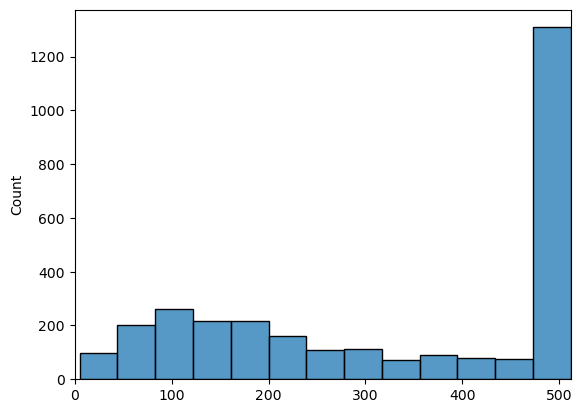

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(token_counts)
plt.xlim([0, 512]);

In [21]:
# Sections of config
MAX_LEN = 512
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 4
EPOCHS = 3
LEARNING_RATE = 1e-05

In [22]:
class CustomDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.summary = dataframe.summary
        self.labels = self.data.labels
        self.max_len = max_len

    def __len__(self):
        return len(self.summary)

    def __getitem__(self, index):
        summary = str(self.summary[index])
        summary = " ".join(summary.split())

        inputs = self.tokenizer.encode_plus(
            summary,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'labels': torch.tensor(self.labels[index], dtype=torch.float)
        }

In [23]:
# Splitting the DataFrame into features (X) and labels (y)
new_df = df[['summary', 'labels']]

train_size = 0.7
train_dataset=new_df.sample(frac=train_size,random_state=42)
test_dataset=new_df.drop(train_dataset.index).reset_index(drop=True)
train_dataset = train_dataset.reset_index(drop=True)


print("FULL Dataset: {}".format(new_df.shape))
print("TRAIN Dataset: {}".format(train_dataset.shape))
print("TEST Dataset: {}".format(test_dataset.shape))

training_set = CustomDataset(train_dataset, tokenizer, MAX_LEN)
testing_set = CustomDataset(test_dataset, tokenizer, MAX_LEN)

FULL Dataset: (3000, 2)
TRAIN Dataset: (2100, 2)
TEST Dataset: (900, 2)


In [24]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

In [ ]:
class BertClass(torch.nn.Module):
    def __init__(self):
        super(BertClass, self).__init__()
        self.bert = transformers.BertModel.from_pretrained('bert-base-uncased')
        self.dropout = torch.nn.Dropout(0.1)
        self.fc = torch.nn.Linear(self.bert.config.hidden_size, 6)

    def forward(self, ids, mask):
        _, output1 = self.bert(input_ids=ids, attention_mask=mask, return_dict=False)
        output2 = self.dropout(output1)
        output = self.fc(output2)
        return output

model = BertClass()
model.to(device)

100%|█████████████████████████| 440473133/440473133 [00:57<00:00, 7608878.80B/s]


In [155]:
def loss_fn(outputs, labels):
    return torch.nn.CrossEntropyLoss()(outputs, labels)

In [156]:
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [157]:
def train(epoch):
    model.train()
    for _,data in enumerate(training_loader, 0):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        #token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        labels = data['labels'].to(device, dtype = torch.float)

        outputs = model(ids, mask)

        optimizer.zero_grad()
        loss = loss_fn(outputs, labels)
        if _%100==0:
            print(f'Epoch: {epoch}, Loss:  {loss.item()}')
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [158]:
for epoch in range(EPOCHS):
    train(epoch)

/Users/bryanmaruyama/anaconda3/envs/ML-env/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch: 0, Loss:  1.839017629623413
Epoch: 0, Loss:  1.3627631664276123
Epoch: 0, Loss:  0.6552016735076904


In [159]:
def validation(epoch):
    model.eval()
    fin_targets = []
    fin_outputs = []
    
    with torch.no_grad():
        for _, data in enumerate(testing_loader, 0):
            ids = data['ids'].to(device, dtype=torch.long)
            mask = data['mask'].to(device, dtype=torch.long)
            labels = data['labels'].to(device, dtype=torch.long) 
            
            outputs = model(ids, mask)
            
            fin_targets.extend(labels.cpu().detach().numpy().tolist())
            fin_outputs.extend(torch.nn.functional.softmax(outputs, dim=1).cpu().detach().numpy().tolist())

    return fin_outputs, fin_targets

In [160]:
outputs, targets = validation(epoch)

In [114]:
o = outputs.copy()
t = targets.copy()

In [161]:
for i in range(len(o)):
    max_value = max(outputs[i])

# Find the index of the maximum value using the index method
    max_index = outputs[i].index(max_value)
    outputs[i] = [0 for _ in outputs[i]]
    outputs[i][max_index] = 1

In [162]:
print(outputs)

[[0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0],

In [164]:
targets_single_label = np.argmax(targets, axis=1)
outputs_single_label = np.argmax(outputs, axis=1)

accuracy = metrics.accuracy_score(targets_single_label, outputs_single_label)
f1_score_macro = metrics.f1_score(targets_single_label, outputs_single_label, average='macro')
print(f"Accuracy Score = {accuracy}")
print(f"F1 Score (Macro) = {f1_score_macro}")

Accuracy Score = 0.7122222222222222
F1 Score (Micro) = 0.7122222222222222
F1 Score (Macro) = 0.7083843549672116


In [109]:
true_labels = [[0, 1, 0], [1, 0, 0], [0, 0, 1], [0, 1, 0]]
predicted_labels = [[0, 1, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1]]

# Convert one-hot encoded labels to class indices
true_indices = [list.index(1) for list in true_labels]
predicted_indices = [list.index(1) for list in predicted_labels]
print(true_indices)
print(predicted_indices)

[1, 0, 2, 1]
[1, 0, 1, 2]
